Este código calcula las soluciones a la ecuación de Laplace. 
Para ello se utiliza 1 núcleo del procesador. 

In [1]:
#---------------------------- Liberias -----------------------------------------

import numpy as np
from numpy import *                         
import matplotlib.pylab as p
from mpl_toolkits.mplot3d import Axes3D 
from numba import jit, njit #libreria numba, me permite que el programa se ejecute más rápido. 
import math
import random #Liberia para generar numeros aleatorios
import matplotlib.pyplot as plt
import numpy as np
import multiprocessing 
import multiprocessing as mp
from multiprocessing import Pool
from multiprocessing import Process, Lock
multiprocessing.cpu_count()
from time import perf_counter
import pandas as pd

350.927983507


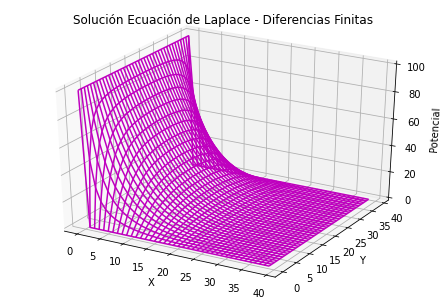

351.272686167


In [4]:
#-------------------------------------------- MÉTODO DE DIFERENCIAS FINITAS --------------------------------------------


N = 100  # iteraciones
V_2 = zeros((40,40)) # potencial V por el método de diferencias finitas.
Nx=40 # Tamaño. 

#--------------------------------------------- Condiciones de Frontera.  --------------------------------------------

for k in range(0, 40-1):                      
    V_2[k,0] = 100  # para j=0 V=100.
    
for n in range(N):                                  
    for i in range(1, Nx-1):                                                
        for j in range(1,Nx-1): # Diferencias finitas
            V_2[i,j] = (1/4)*(V_2[i+1,j]+V_2[i-1,j]+V_2[i,j+1]+V_2[i,j-1]) # Potencial por diferencias finitas. 
            
x = arange(0, 40,1) #Coordenada x, el cual es una rejilla de 40*40
y = arange(0, 40,1) # Coordenada Y
X,Y = p.meshgrid(x, y) 
tin=perf_counter()
print(tin)
fig = p.figure()                                 #Dibuja figura
ax = Axes3D(fig)                                              
ax.plot_wireframe(X, Y, V_2, color='m')  
ax.set_title('Solución Ecuación de Laplace - Diferencias Finitas')
ax.set_xlabel('X')                                     
ax.set_ylabel('Y')
ax.set_zlabel('Potencial')
plt.savefig('FinitDiference.pdf') #Me guarda la imagen en formato .pdf
p.show()
tini1=perf_counter()
print(tini1)


469.540959369


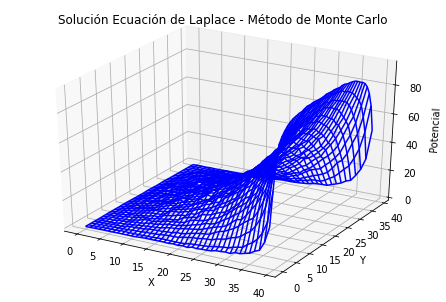

469.89084021


In [8]:
#-------------------------------------------- MÉTODO DE MONTE CARLO. --------------------------------------------

#----------------------------------------- Condiciones iniciales -------------------------------------------

V=np.zeros((40,40),float) # potencial V por el método.

#-------------------------------------------- Programa ------------------------------------------------------

@njit #(parallel=True). ejecuta más rápido el programa. 
def Potencial(imax,jmax):
    np.random.seed(34)# Ya que utilizamos Numba.
    sum=0
    nrun=1000
    for k in range(nrun):
        i=imax
        j=jmax
        while(i<=40 and j<=40):
            r=np.random.rand() # Números aleatorios. 
            
            # A continuación se dan las condiciones de frontera para las problabilidades utilizadas por el 
            # método de diferencias finitas. 
            
            if (r>=0.0 and r<0.25): i=i+1 #Probabilidad para la posición i=i+1
            if (r>=0.25 and r<0.5): i=i-1 #Probabilidad para la posición i=i-1
            if (r>=0.5 and r<0.75): j=j-1 #Probabilidad para la posición j=j-1
            if (r>=0.75 and r<=1.0): j=j+1 #Probabilidad para la posición j=j+1


#----------------------------- Condiciones de frontera en el problema de Laplace. ----------------------------------------

            if (i==0.0):
                sum=sum+0.0
                break
        
            if (i==40):
                sum=sum+0.0
                break
    
            if (j==0.0): 
                sum=sum+0.0
                break
                
            if (j==40): 
                sum=sum+100
                break  

    return sum/nrun

for i in range (0,40):
    for j in range (0,40):
        V[i,j]=Potencial(i,j)
        
tin_2=perf_counter()
print(tin_2) 

x=np.arange(0,40,1) # Coordenada x, el cual es una rejilla de 40*40
y=np.arange(0,40,1) # Coordenada y. 

X,Y=np.meshgrid(x,y)
fig=p.figure()
ax=Axes3D(fig)
ax.plot_wireframe(X,Y,V, color='b')
ax.set_title('Solución Ecuación de Laplace - Método de Monte Carlo')
ax.set_xlabel('X')                                     
ax.set_ylabel('Y')
ax.set_zlabel('Potencial')
plt.savefig('MC.pdf') #Me guarda la imagen en formato .pdf
p.show()
tin2=perf_counter()
print(tin2)